In [11]:
import sys

!{sys.executable} -m pip install advertools
!{sys.executable} -m pip install textblob

In [12]:
import pandas as pd
df=pd.read_csv('/kaggle/input/gcash1/combined_reviews.csv') 
df

,date,review,rating
0,2021-02-17 06:32:13,Nakakadismaya naman. Dati okay naman yung gcas...,1
1,2020-03-24 03:28:48,Don’t ever put your money here! My transaction...,1
2,2020-09-15 16:58:57,Best as it has no fees. Wish they had rebates ...,5
3,2020-06-07 09:31:21,Gcash has been very helpful in many ways to me...,1
4,2020-09-25 09:19:47,I USED METROBANK INSTAPAY TO CASH IN BUT UNTIL...,1
...,...,...,...
112270,2021-03-25 06:39:35,Very nice its help to me in my business load,5
112271,2021-04-12 15:21:24,I love gcash..im happy using this app,5
112272,2020-07-22 22:47:16,Love it,5
112273,2021-05-28 04:05:36,Very nice,5


In [13]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math


# Importing dataset
# as_df=pd.read_csv('/kaggle/input/paymaya/paymaya_app_store_reviews.csv') 
# gps_df=pd.read_csv('/kaggle/input/paymaya/paymaya_play_store_reviews.csv') 



reviews_df = df.copy()
reviews_df = reviews_df.rename(columns = {'review': 'content','rating':'score','date':'at'})
# reviews_df = pd.concat([gps_df, apple])
reviews_df['content'] = reviews_df['content'].astype(str)
reviews_df['at'] = pd.to_datetime(reviews_df['at'])   
print("Shape of data=>",reviews_df.shape)
reviews_df.head()

Shape of data=> (112275, 3)


,at,content,score
0,2021-02-17 06:32:13,Nakakadismaya naman. Dati okay naman yung gcas...,1
1,2020-03-24 03:28:48,Don’t ever put your money here! My transaction...,1
2,2020-09-15 16:58:57,Best as it has no fees. Wish they had rebates ...,5
3,2020-06-07 09:31:21,Gcash has been very helpful in many ways to me...,1
4,2020-09-25 09:19:47,I USED METROBANK INSTAPAY TO CASH IN BUT UNTIL...,1


## Data Preprocess

### Remove Punctuations

In [14]:
import string

# init empty list
clean_lst = []

for review in reviews_df['content']:
    # convert each review to a string to avoid AttributeErrors while using the translate method
    str_review = str(review)
    clean_review = str_review.translate(str.maketrans('', '', string.punctuation))
    clean_lst.append(clean_review)

### Remove emojis/emoticons, flags (iOS), pictographs, and transportation and map symbols from all reviews

In [15]:
# init empty list
final_lst = []

for review in clean_lst:
    final_review = review.encode('ascii', 'ignore').decode('ascii')
    final_lst.append(final_review.lower().strip())
    
# set all strings to lowercase and split every line to strings
review_lst = [line.split() for line in final_lst]

### clean data by removing stopwords and lemmatizing each word using the nltk library

In [16]:
from nltk.corpus import wordnet

# Helper function to lemmatize with part of speech (POS) tag
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [17]:
# https://www.nltk.org/
# import the Natural Language Toolkit (nltk) library to further process the parsed word data
import nltk
import advertools as adv
from nltk.corpus import stopwords
from textblob import TextBlob, Word
from nltk.stem import WordNetLemmatizer

# index value
value = 29

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.update(adv.stopwords['tagalog'])

tlg = ['yung','nyo','di','wala','naman','nag','pera','sana','u']

stop_words.update(tlg)

# Init Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Remove stop words from each line and lemmatize each word
clean_review_lst = [[lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words if not word in stop_words] for words in review_lst]

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'gps_df' is not defined

In [19]:
# compare original output from 'cleaned' output 
print(f'\nOriginal (length = {len(reviews_df.iloc[value, 1].split())}):\n{reviews_df.iloc[value, 1].split()}')
print(f'\nPreprocessed (length = {len(clean_review_lst[value])}):\n{clean_review_lst[value]}\n')


Original (length = 126):
['I', 'transferred', 'a', 'sum', 'of', 'money', 'to', 'a', 'bank', 'account', 'through', 'GCash.', 'Due', 'to', 'the', 'volume', 'of', 'transactions', 'the', 'recipient', 'has', 'in', 'their', 'bank', 'account,', 'they', 'cannot', 'identify', 'my', 'transaction.', 'I', 'requested', 'the', 'customer', 'service', 'to', 'provide', 'a', 'supporting', 'document', 'that', 'can', 'be', 'used', 'by', 'the', 'recipient', 'to', 'trace', 'the', 'amount', 'I', 'transferred.', 'Unfortunately,', 'all', 'I', 'received', 'is', 'just', 'an', 'email', 'confirmation', 'that', 'the', 'amount', 'was', 'credited,', 'nothing', 'else.', 'I', 'keep', 'on', 'following', 'this', 'up', 'but', 'all', 'I', 'received', 'is', 'that', 'they', 'need', 'more', 'time', 'to', 'check', 'on', 'how', 'they', 'can', 'help', 'me.', 'This', 'is', 'so', 'frustrating', 'because', 'it’s', 'already', 'been', '6', 'months.', 'I’ll', 'never', 'use', 'Gcash', 'again', 'for', 'transactions', 'involving', 'larg

In [20]:
# append cleaned content to a new clean_content column in the datframe
reviews_df['clean_content'] = clean_review_lst

# EDA


In [21]:
reviews_df.groupby(['score']).count()[['content']]

,content
score,
1,30588
5,81687


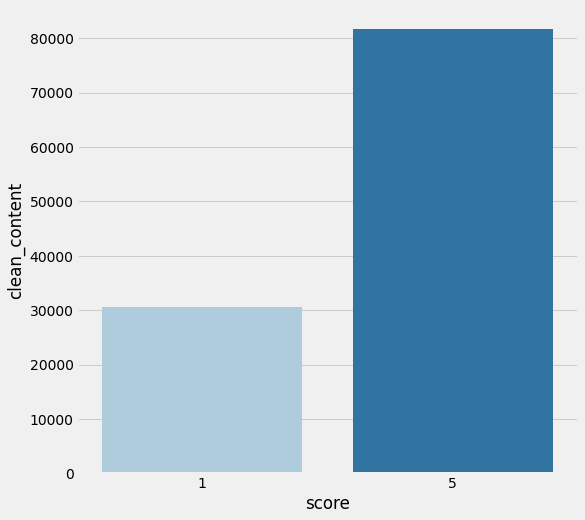

In [22]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,8))

df_2 = reviews_df.groupby('score').count()
df_2.reset_index(inplace=True)
ax = sns.barplot(x='score', y='clean_content', data=df_2, palette='Paired');
# ax.set_title('\nRecommendations vs \'Constructive\' Criticism\n', fontsize=25)

values = reviews_df['score'].value_counts()

# for i, p in enumerate(ax.patches):
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2, height, values[i], ha="center")

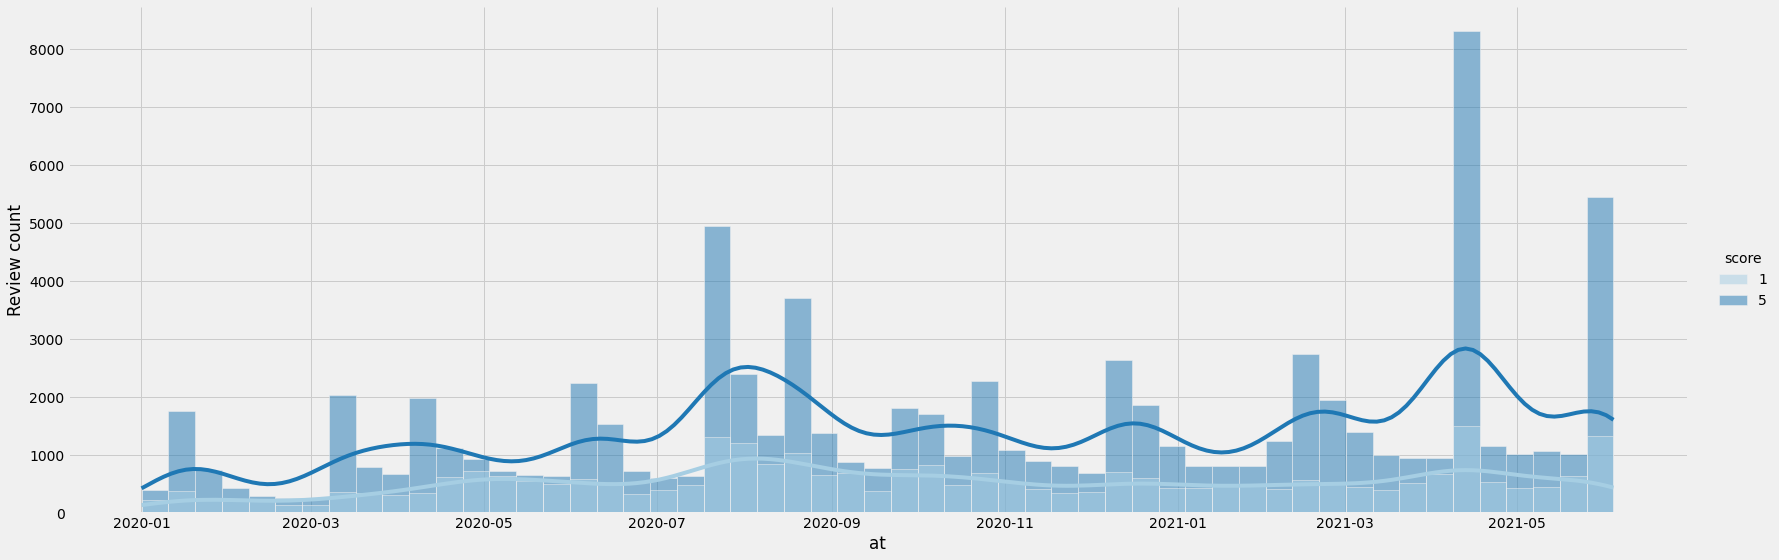

In [23]:
plt.style.use('fivethirtyeight')

s = sns.displot(data=reviews_df, x='at', hue='score', height=8, aspect=3, palette='Paired', kde=True)
s.set(ylabel='Review count')

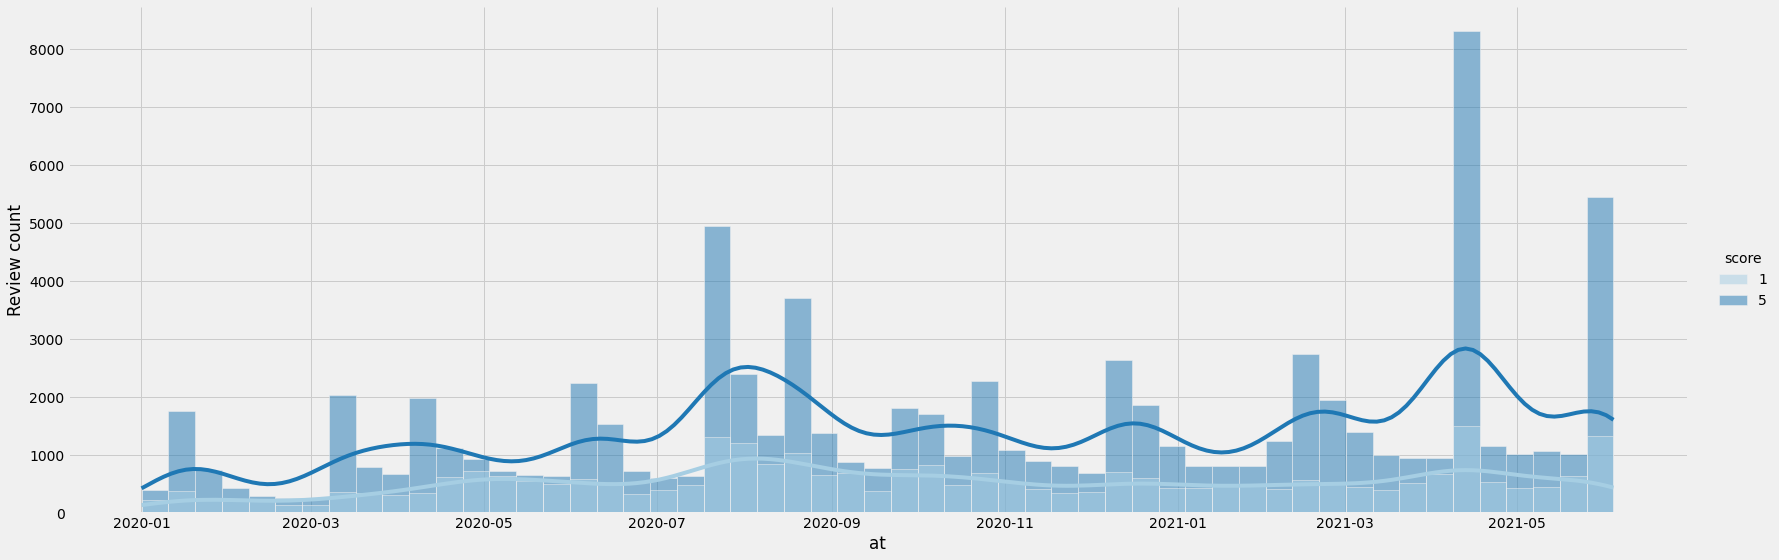

In [26]:
plt.style.use('fivethirtyeight')

s = sns.displot(data=reviews_df, x='at', hue='score', height=8, aspect=3, palette='Paired', kde=True)
s.set(ylabel='Review count')

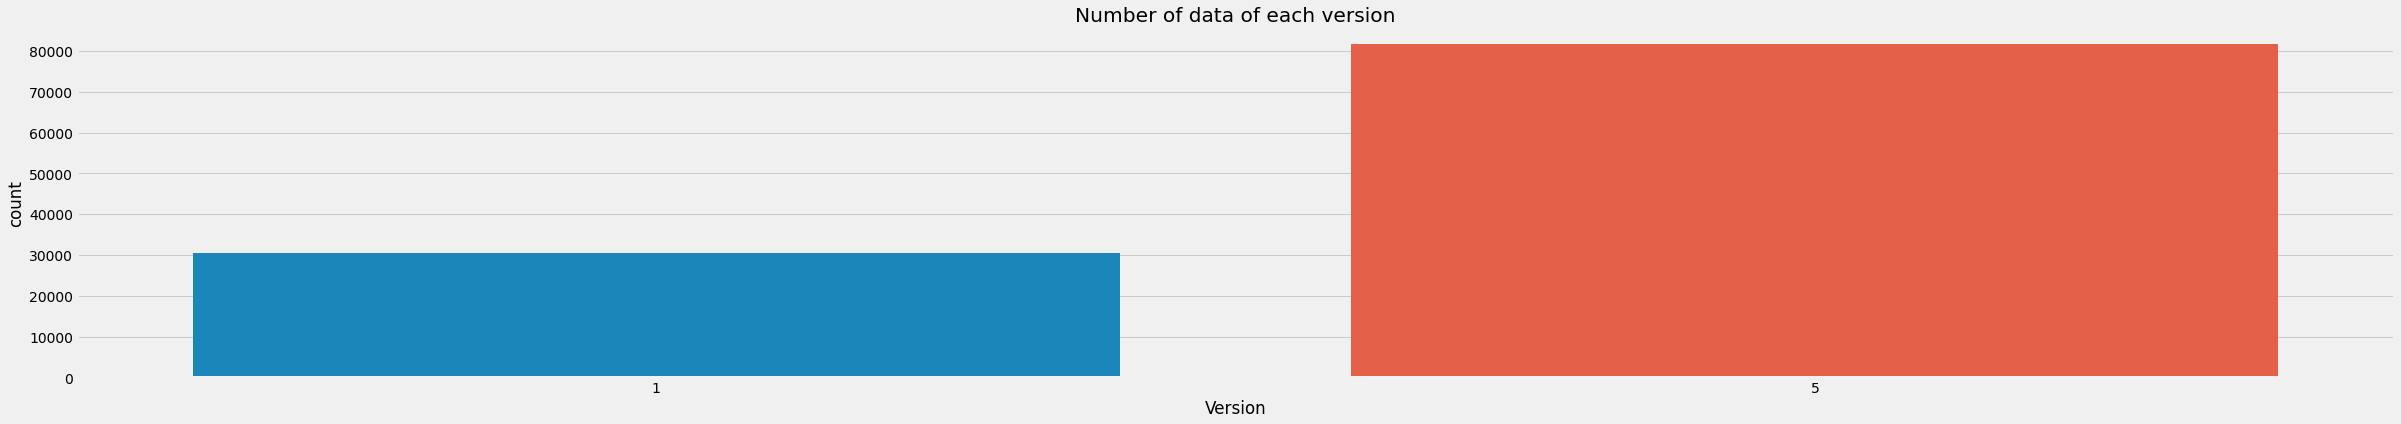

In [27]:
plt.figure(figsize=(37, 6))
sns.countplot(x='score', data=reviews_df)
plt.xlabel("Version")
plt.title("Number of data of each version")
plt.show()

# Prep for Topic Model

In [28]:
df = reviews_df.copy()

In [30]:
df['cleaned']=df['content'].apply(lambda x: x.lower())
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['cleaned']=df['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# Removing extra spaces
df['cleaned']=df['cleaned'].apply(lambda x: re.sub(' +',' ',x))

# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

df_grouped=df[['score','lemmatized']].groupby(by='score').agg(lambda x:' '.join(x))

freq = pd.Series(' '.join(df['lemmatized']).split()).value_counts()
less_freq = list(freq[freq ==1].index)

df['review1'] = df['lemmatized'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))
df['review1'] = df['review1'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df['review1'].head()

KeyError: 'reviewCreatedVersion'

# DATA ANALYSIS

In [32]:
df['review_len'] = df['lemmatized'].astype(str).apply(len)
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))

In [33]:
stop_words = set(stopwords.words('english'))
stop_words.update(adv.stopwords['tagalog'])

tlg = ['yung','nyo','di','wala','naman','nag','pera','sana','u', 'ng', 'app']
stop_words.update(tlg)

df['lemmatized'] = df['lemmatized'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['lemmatized']

0         nakakadismaya dati okay gcash ah maopen naka d...
1         money transaction limit exceed error admit hot...
2                      well fee wish rebate utility payment
3         gcash helpful way transaction smooth time issu...
4         metrobank instapay cash receive 😡 worth hard e...
                                ...                        
112270                              nice help business load
112271                                   love gcashim happy
112272                                                 love
112273                                                 nice
112274                     verify school bad ughhh pls help
Name: lemmatized, Length: 112275, dtype: object

In [35]:
from textblob import TextBlob, Word, Blobber
df['polarity'] = df['lemmatized'].map(lambda text: TextBlob(text).sentiment.polarity)

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'review_len'}>,
        <AxesSubplot:title={'center':'word_count'}>],
       [<AxesSubplot:title={'center':'polarity'}>, <AxesSubplot:>]],
      dtype=object)

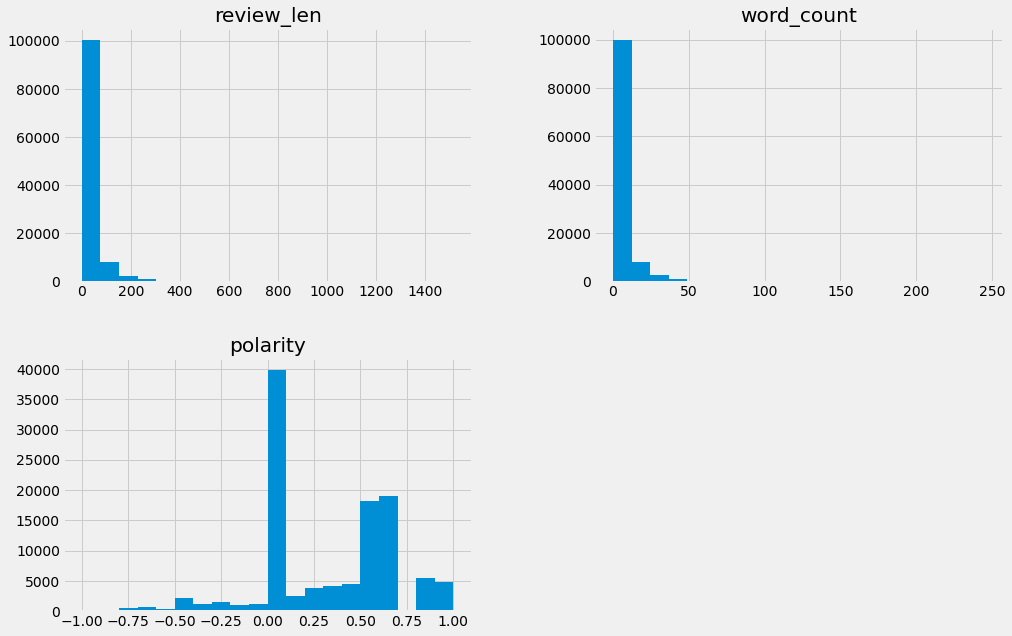

In [36]:
df[["review_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10))

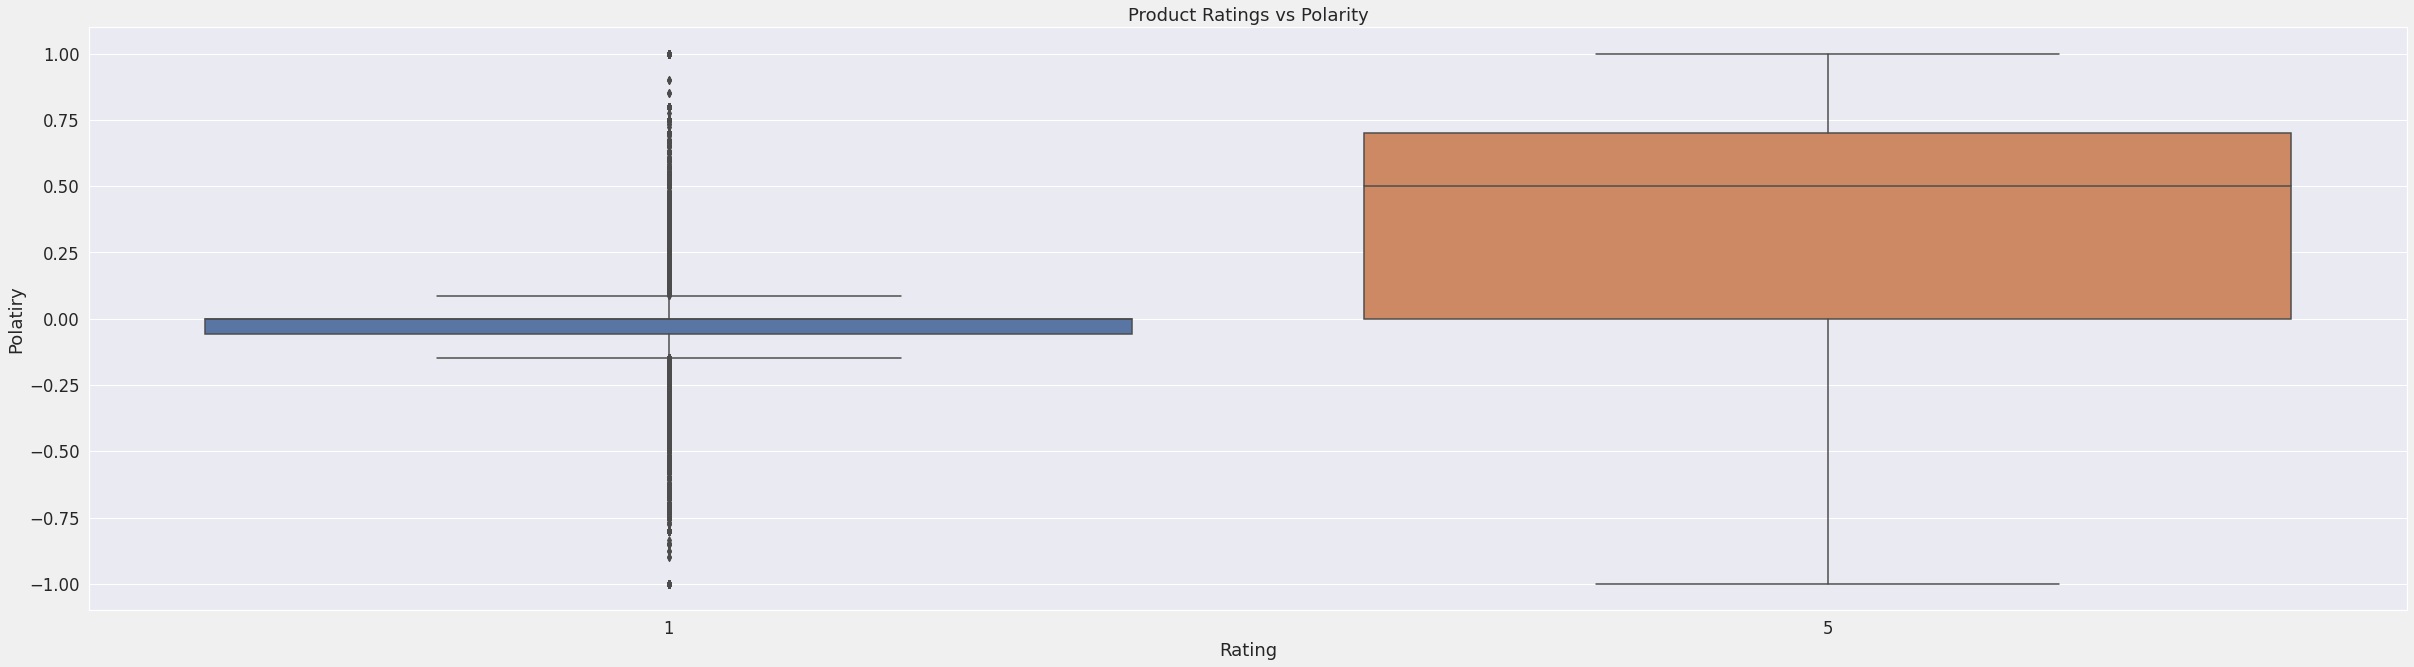

In [40]:
import seaborn as sns

plt.figure(figsize = (37, 10))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.boxplot(x = 'score', y = 'polarity', data = df)
plt.xlabel("Rating")
plt.ylabel("Polatiry")
plt.title("Product Ratings vs Polarity")
plt.show()

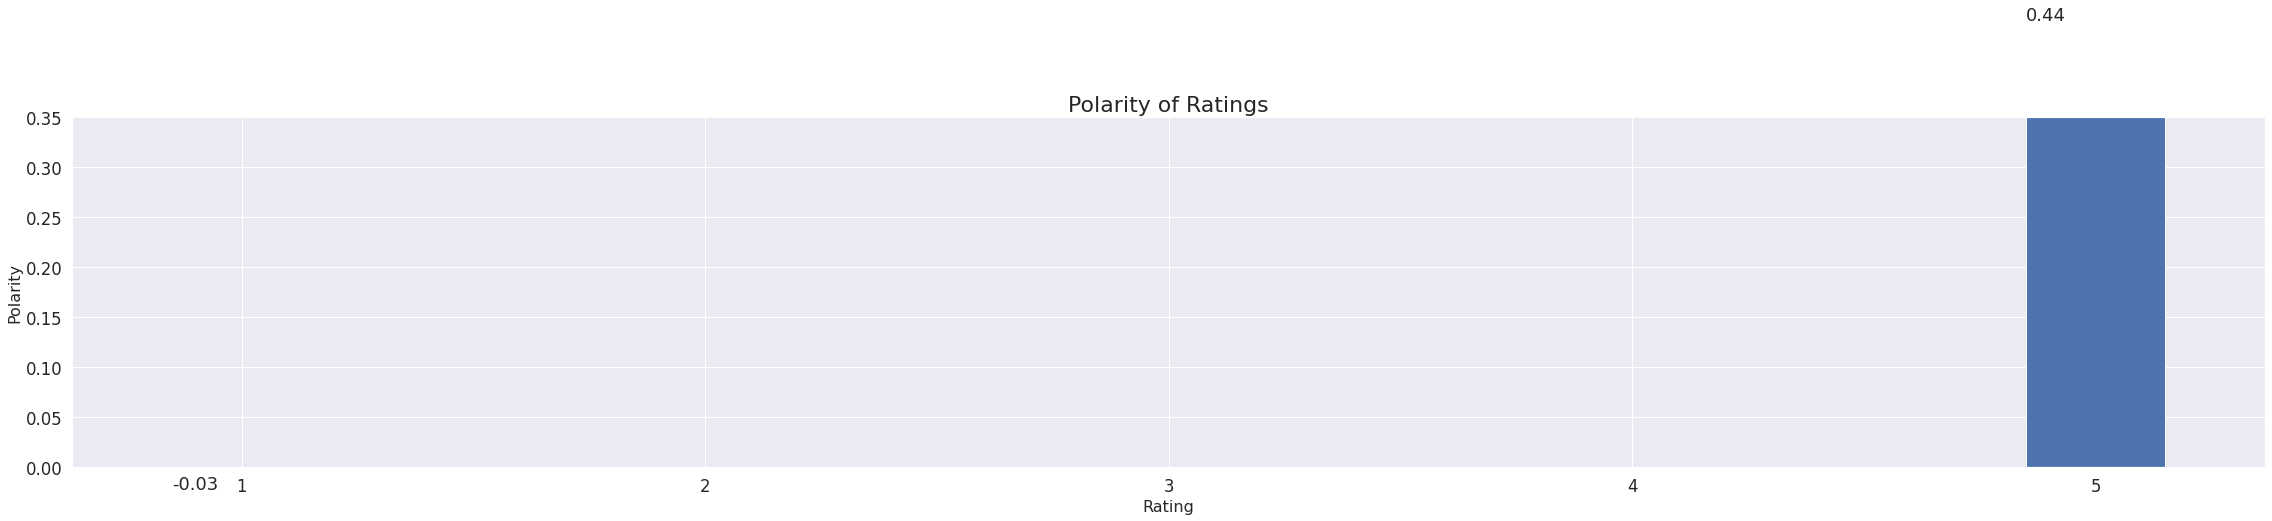

In [42]:
mean_pol = df.groupby('score')['polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
fig, ax = plt.subplots(figsize=(35, 6))
plt.bar(mean_pol.index, mean_pol.mean_polarity, width=0.3)
#plt.gca().set_xticklabels(mean_pol.index, fontdict={'size': 14})
    
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.01, str("{:.2f}".format(i.get_height())))
plt.title("Polarity of Ratings", fontsize=22)
plt.ylabel("Polarity", fontsize=16)
plt.xlabel("Rating", fontsize=16)
plt.ylim(0, 0.35)
plt.show()

## Frequency Charts

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(df['lemmatized'], 20)
df1 = pd.DataFrame(common_words, columns = ['Review', 'count'])
df1.head()

,Review,count
0,good,19680
1,gcash,13079
2,nice,11032
3,update,6727
4,use,6582


<AxesSubplot:title={'center':'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

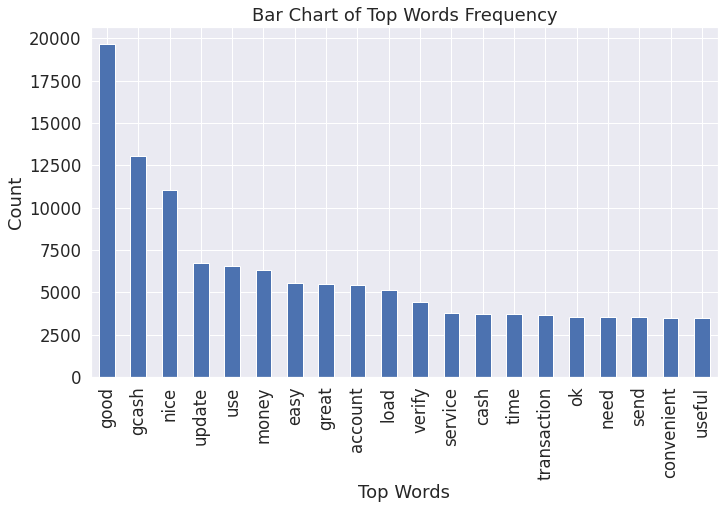

In [44]:
df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)


In [45]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(df['lemmatized'], 30)
df2 = pd.DataFrame(common_words2, columns=['Review', "Count"])
df2.head()

,Review,Count
0,easy use,1893
1,pay bill,1625
2,buy load,1546
3,send money,1337
4,customer service,1300


<AxesSubplot:title={'center':'Bar chart of Bigrams Frequency'}, xlabel='Bigram Words', ylabel='Count'>

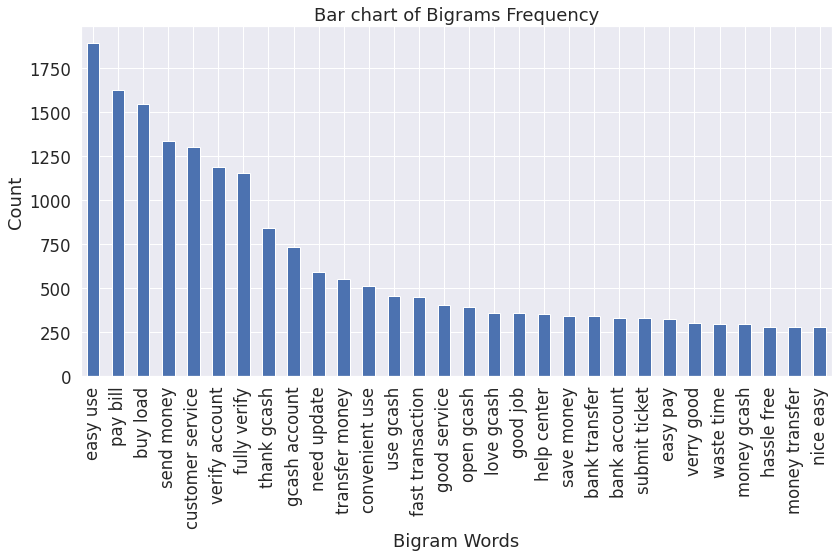

In [46]:
df2.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)

In [1]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_trigram(df['lemmatized'], 30)
df3 = pd.DataFrame(common_words3, columns = ['Review' , 'Count'])
df3.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency",
    colormap='Pastel2'
)

NameError: name 'df' is not defined

<AxesSubplot:title={'center':'Bar chart of Trigrams Frequency for Poor Ratings'}, xlabel='Trigram Words', ylabel='Count'>

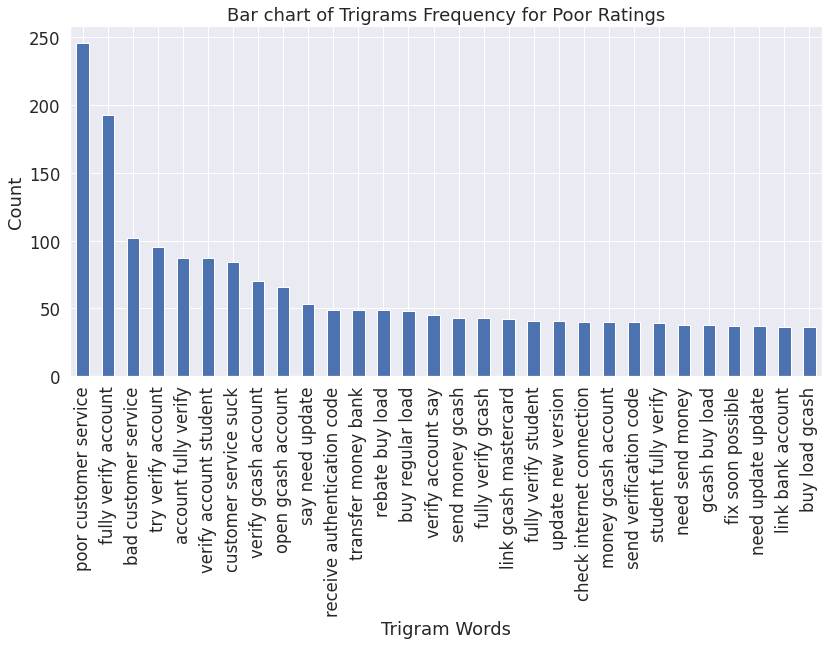

In [54]:
bad_df = df.loc[df['score'] == 1]

common_words4 = get_top_n_trigram(bad_df['lemmatized'], 30)
df4 = pd.DataFrame(common_words4, columns = ['Review' , 'Count'])
df4.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency for Poor Ratings"
)

<AxesSubplot:title={'center':'Bar chart of Trigrams Frequency for Good Ratings'}, xlabel='Trigram Words', ylabel='Count'>

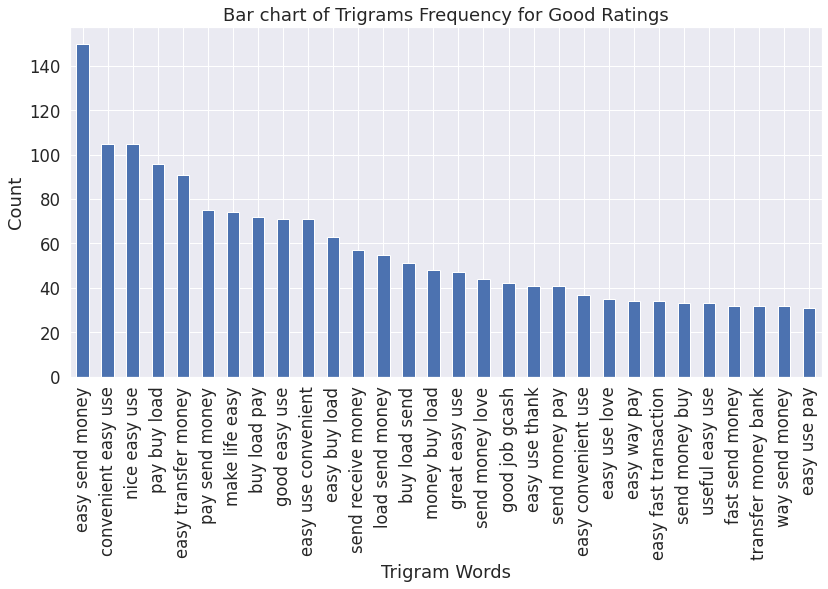

In [57]:
good_df = df.loc[df['score'] == 5]

common_words5 = get_top_n_trigram(good_df['lemmatized'], 30)
df5 = pd.DataFrame(common_words5, columns = ['Review' , 'Count'])
df5.groupby('Review').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency for Good Ratings"
)